<a href="https://colab.research.google.com/github/eduardogranillo/FisicaComputacional/blob/master/Actividad5/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 5.

Eduardo Granillo Luna



# Ejemplos de clase

In [ ]:
# Importamos las bibliotecas a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Matplotlib mostrará los resultados de la Notebook en la Jupyter


In [ ]:
# concentración de las operaciones del dataframe original df_dist

# Tomar la dirección URL del archivo en raw
url = 'https://raw.githubusercontent.com/eduardogranillo/FisicaComputacional/master/Actividad1/ClimatologiaDiaria.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()

# Conversión de la columna de Mes a cadena de caracteres (en este caso Variable
# categórica), en lugar de tener los meses denotados por enteros.
# Función .dt.strftime('%b'), %b representa los meses en formato: Jan, Feb,...

# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16063 entries, 0 to 16062
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   16063 non-null  datetime64[ns]
 1   Precip  16058 non-null  float64       
 2   Evap    10094 non-null  float64       
 3   Tmax    15199 non-null  float64       
 4   Tmin    15191 non-null  float64       
 5   Año     16063 non-null  int64         
 6   Mes     16063 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 878.6+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1956-01-01     0.0   NaN   NaN   NaN  1956  Jan
1 1956-01-02     0.0   NaN   NaN   NaN  1956  Jan
2 1956-01-03     0.0   NaN   NaN   NaN  1956  Jan
3 1956-01-04     0.0   NaN   NaN   NaN  1956  Jan
4 1956-01-05     0.0   NaN   NaN   NaN  1956  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
16058 2010-06-26     0.0  10.8  33.0  14.5  2010  Jun
16059

Creamos una Serie de Tiempo, fijando la variable 'Fecha' como un nuevo índice del DataFrame.

In [ ]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_ts = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

# Verificamos
df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16063 entries, 1956-01-01 to 2010-06-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  16058 non-null  float64
 1   Evap    10094 non-null  float64
 2   Tmax    15199 non-null  float64
 3   Tmin    15191 non-null  float64
 4   Año     16063 non-null  int64  
 5   Mes     16063 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 878.4+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1956-01-01     0.0   NaN   NaN   NaN  1956  Jan
1956-01-02     0.0   NaN   NaN   NaN  1956  Jan
1956-01-03     0.0   NaN   NaN   NaN  1956  Jan
1956-01-04     0.0   NaN   NaN   NaN  1956  Jan
1956-01-05     0.0   NaN   NaN   NaN  1956  Jan
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2010-06-26     0.0  10.8  33.0  14.5  2010  Jun
2010-06-27     0.0  10.8  34.5  15.

In [ ]:
# Seleccionaremos un conjunto de años de 30 años  
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1956) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2020)]

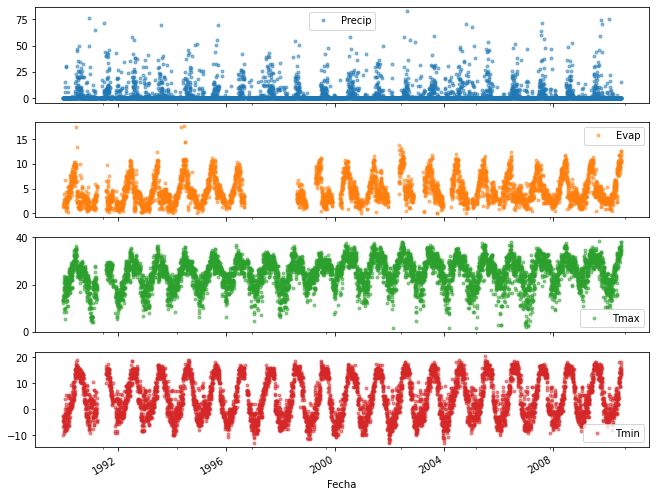

In [ ]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(11, 9), subplots=True)

Variación en Precipitación promedio 10-80 : 0.33259304474470053


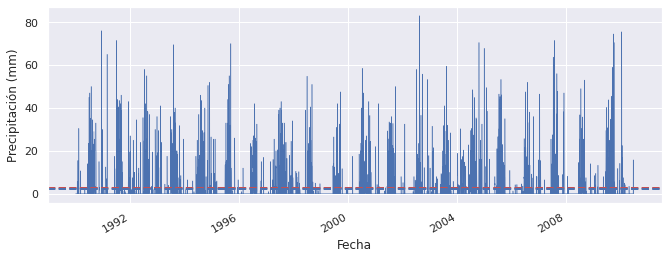

In [ ]:
# Graficamos la Precipitación de los últimos 30 años (1980-hasta 2010)
sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_90 = df_90.Precip.mean()
Precip_ave_60 = df_60.Precip.mean()
df_90['Precip'].plot(linewidth=0.5);
plt.axhline(Precip_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Precip_ave_60, color = 'b', linestyle='--', linewidth=2);
plt.ylabel('Precipitación (mm)');

print('Variación en Precipitación promedio 10-80 :', Precip_ave_90-Precip_ave_60)

Variación ºC Tmax promedio 90-60 : 2.178540343052042


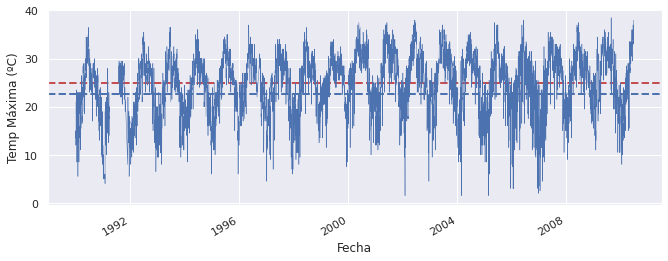

In [ ]:
# Graficamos la Tmax de los últimos 30 años (1980-hasta 2010)
sns.set(rc={'figure.figsize':(11, 4)})
Tmax_ave_90 = df_90.Tmax.mean()
Tmax_ave_60 = df_60.Tmax.mean()
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_60, color = 'b', linestyle='--', linewidth=2);
df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
print('Variación ºC Tmax promedio 90-60 :', Tmax_ave_90-Tmax_ave_60)

Variación ºC Tmin promedio 90-60 : -0.9608626761767605


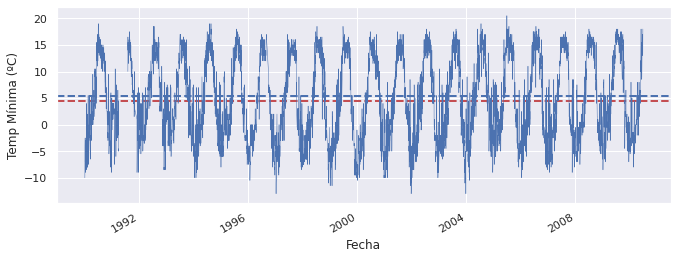

In [ ]:
# Graficamos la Tmin de los últimos 30 años (1990-hasta 2017)
sns.set(rc={'figure.figsize':(11, 4)})
Tmin_ave_90 = df_90.Tmin.mean()
Tmin_ave_60 = df_60.Tmin.mean()
plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_60, color = 'b', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
print('Variación ºC Tmin promedio 90-60 :', Tmin_ave_90-Tmin_ave_60)

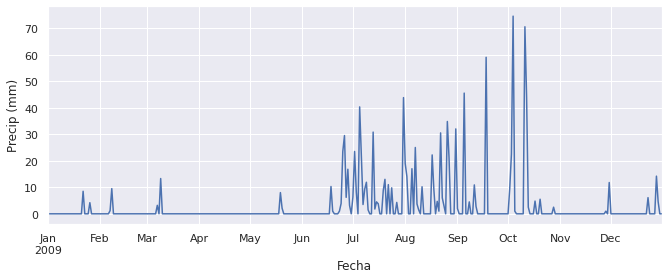

In [ ]:
# Investigando un año de datos
ax = df_90.loc['2009', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

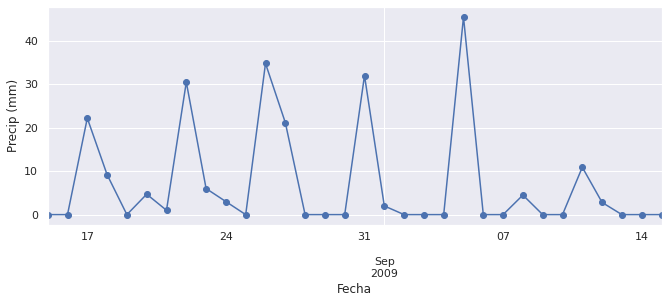

In [ ]:
# Investigando un periodo de datos
ax = df_90.loc['2009-08-15':'2009-09-15', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

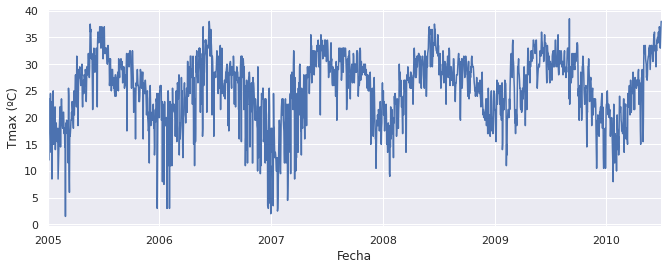

In [ ]:
# Investigando un rango de datos
ax = df_90.loc['2005':'2010', 'Tmax'].plot()
ax.set_ylabel('Tmax (ºC)');

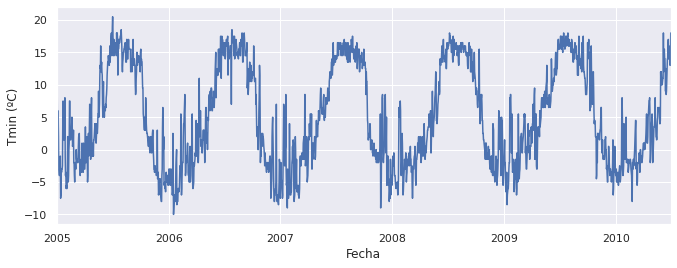

In [ ]:
# Investigando un rango de datos
ax = df_90.loc['2005':'2010', 'Tmin'].plot()
ax.set_ylabel('Tmin (ºC)');

In [ ]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()

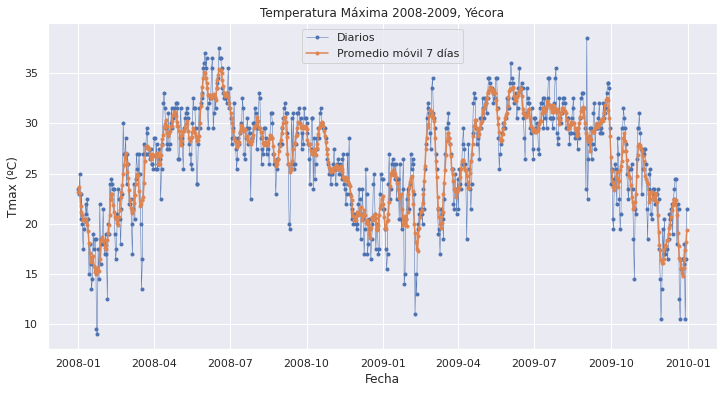

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2008-01', '2009-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2008-2009, Yécora')
ax.legend();

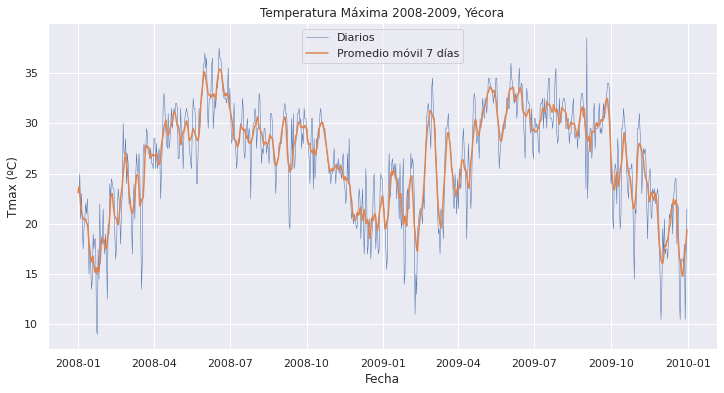

In [ ]:
# Misma gráfica anterior pero sin marcadores '.'
# Fechas de inicio y fin, para filtrar la información
start, end = '2008-01', '2009-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2008-2009, Yécora')
ax.legend();

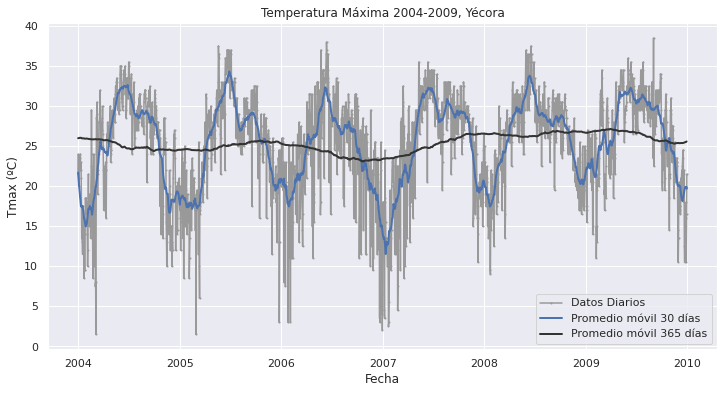

In [ ]:
# Tendencias ... año con año

# Fechas de inicio y fin, para filtrar la información
start, end = '2004-01', '2009-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2004-2009, Yécora')
ax.legend();

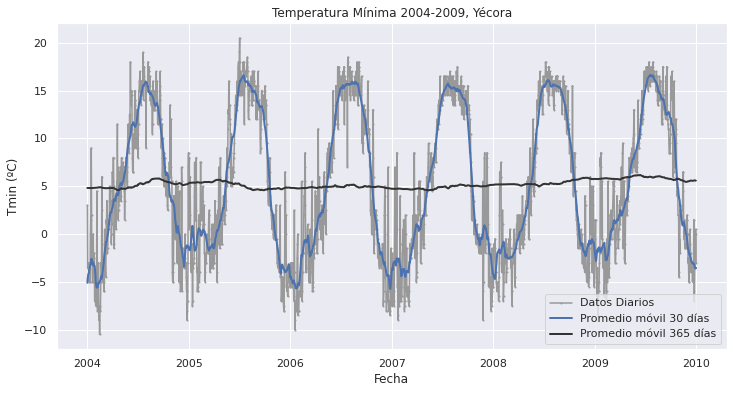

In [ ]:
# Tendencias ... año con año para Tmin

# Fechas de inicio y fin, para filtrar la información
start, end = '2004-01', '2009-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2004-2009, Yécora')
ax.legend();

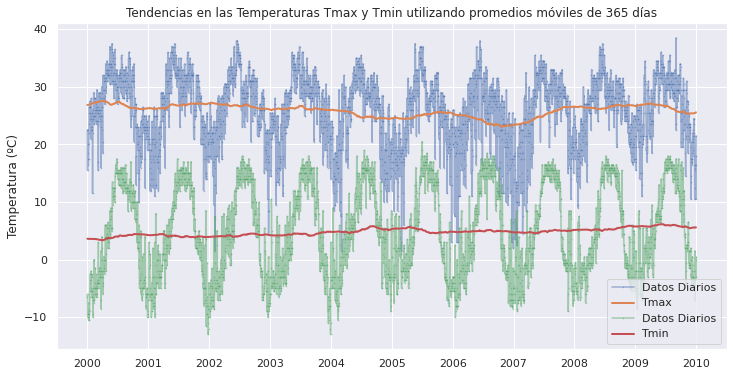

In [ ]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
start, end = '2000-01', '2009-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');


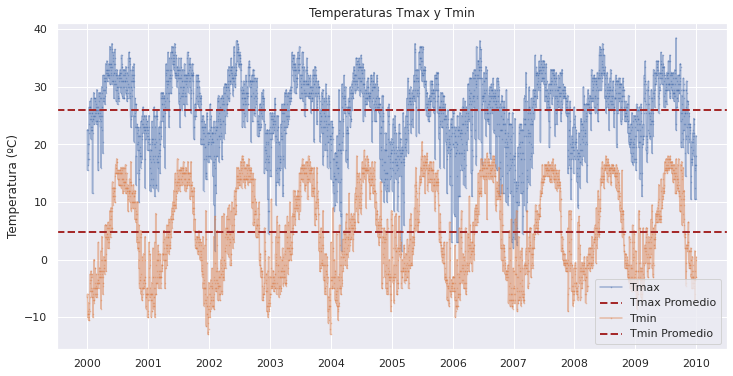

In [ ]:
#Graficas de Temperaturas Tmax, Tmin y Promedios  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2000-01', '2009-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

In [ ]:
df_90_365d.info()
print(df_90_365d.head(185))
print(df_90_365d.tail(185))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7394 entries, 1990-01-01 to 2010-06-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Evap    0 non-null      float64
 1   Tmax    5751 non-null   float64
 2   Tmin    6116 non-null   float64
dtypes: float64(3)
memory usage: 551.1 KB
            Evap  Tmax  Tmin
Fecha                       
1990-01-01   NaN   NaN   NaN
1990-01-02   NaN   NaN   NaN
1990-01-03   NaN   NaN   NaN
1990-01-04   NaN   NaN   NaN
1990-01-05   NaN   NaN   NaN
...          ...   ...   ...
1990-06-30   NaN   NaN   NaN
1990-07-01   NaN   NaN   NaN
1990-07-02   NaN   NaN   NaN
1990-07-03   NaN   NaN   NaN
1990-07-04   NaN   NaN   NaN

[185 rows x 3 columns]
            Evap       Tmax      Tmin
Fecha                                
2009-12-28   NaN  25.521918  5.586301
2009-12-29   NaN  25.550685  5.580822
2009-12-30   NaN  25.582192  5.587671
2009-12-31   NaN        NaN       NaN
2010-01-01   NaN    

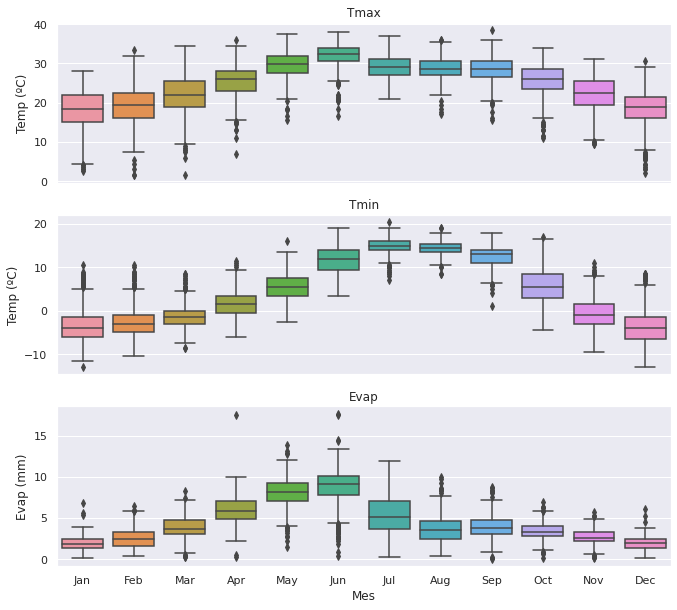

In [ ]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


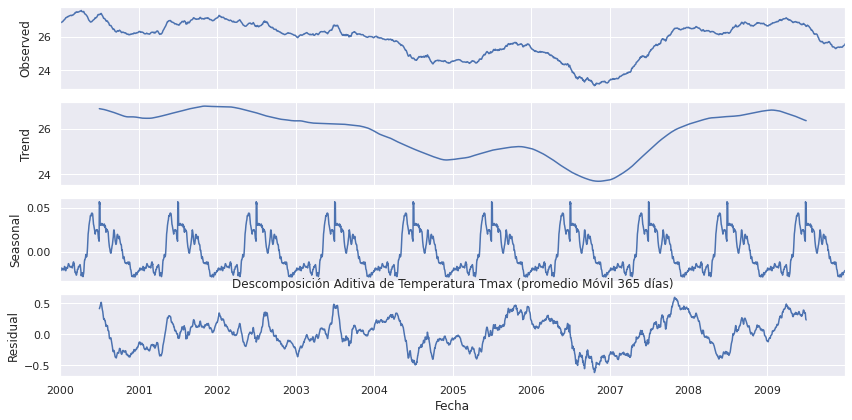

In [ ]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2009-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

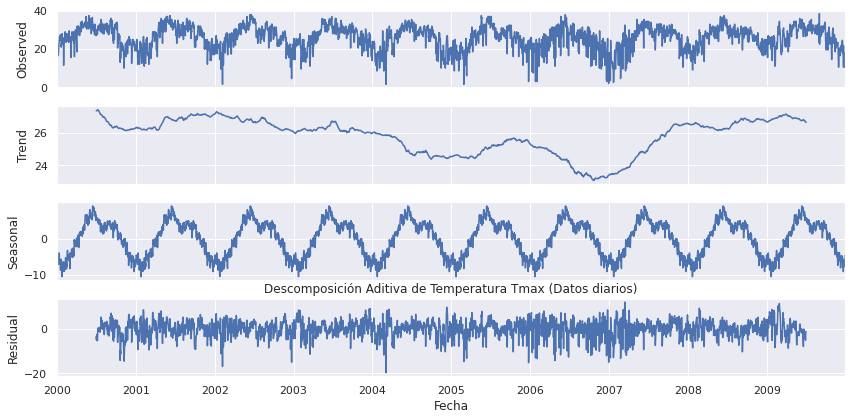

In [ ]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2009-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

# Actividad 1

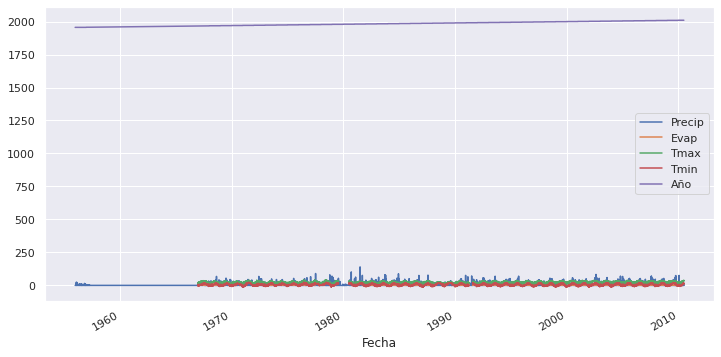

In [ ]:
#Actividad 1. Explora tus datos de Precipitación los últimos años 1990- fin de datos.

#Grafica todo el rango de datos utilizando la función df.plot()
#Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 
#Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

#Graficamos todo el rango de Datos
df_meteo_ts.plot()

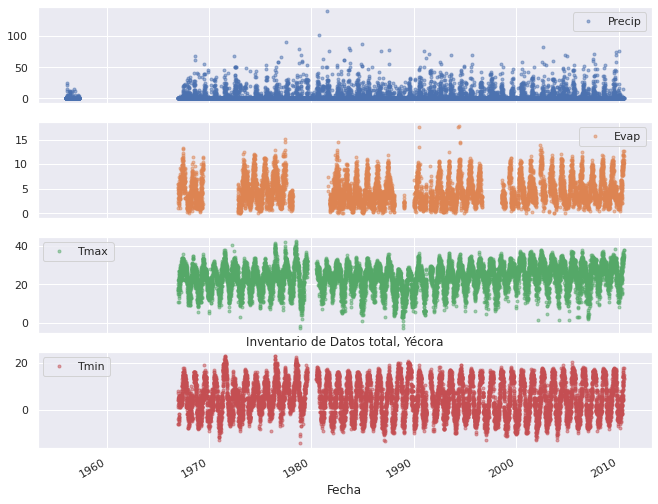

In [ ]:
# Se puede visualizar mejor por columnas

cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_meteo_ts[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos total, Yécora');

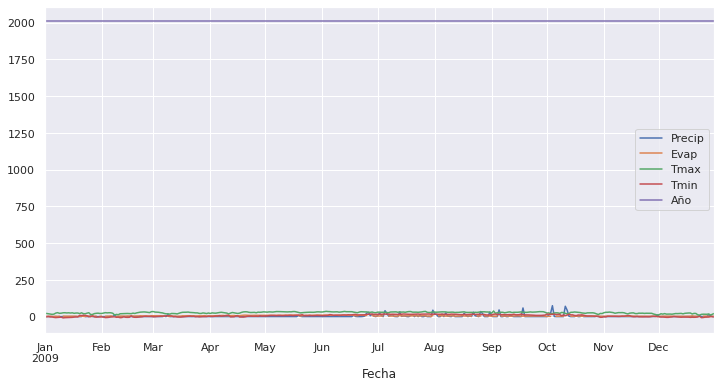

In [ ]:
# Investigando un año de datos
ax = df_90.loc['2009'].plot()


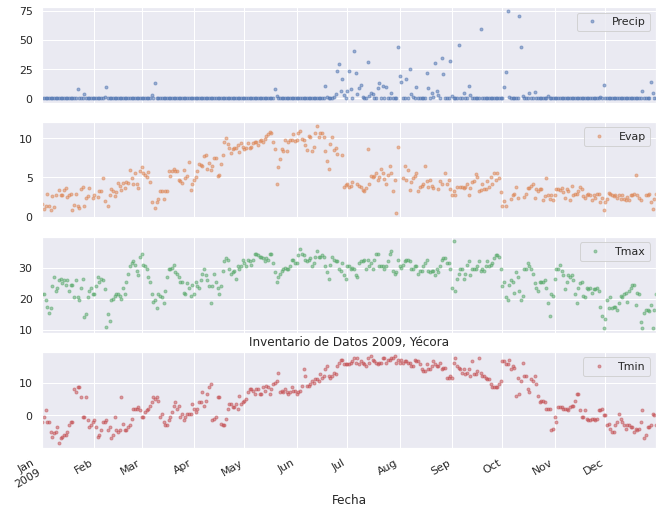

In [ ]:
# Se puede visualizar mejor por columnas

cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90.loc['2009'][cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 2009, Yécora');

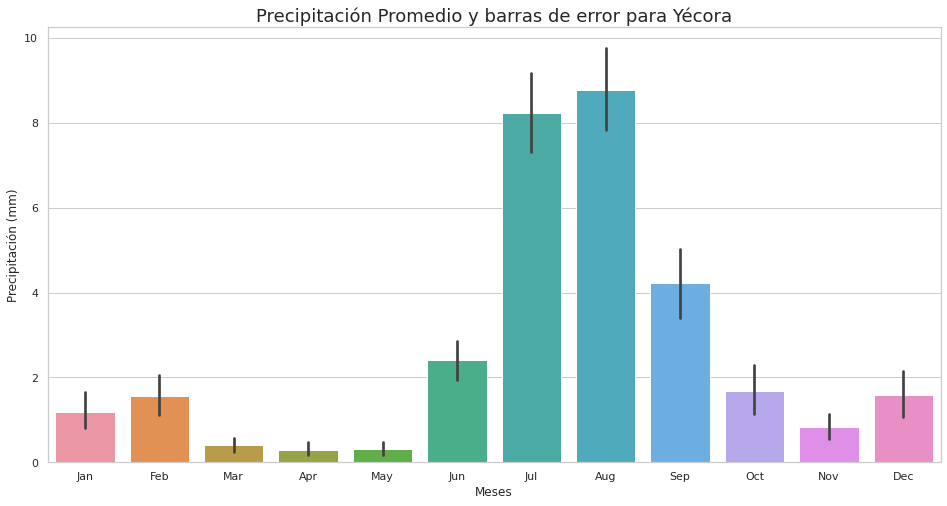

In [ ]:
# Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 1 mes años de datos usando la columna 'Año' en el eje x
g =sns.barplot(x='Mes', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Yécora', fontsize=18)

plt.show()

# Actividad 2

In [ ]:
# Actividad 2. Explora tus datos de Temperaturas Máxima y Mínima 
# de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

# Grafica todo el rango de datos utilizando la función df.plot(), incluye una
# línea punteada mostrando el promedio. 

# Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc() 

# Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(),
# incluye una línea punteada mostrando el promedio.  

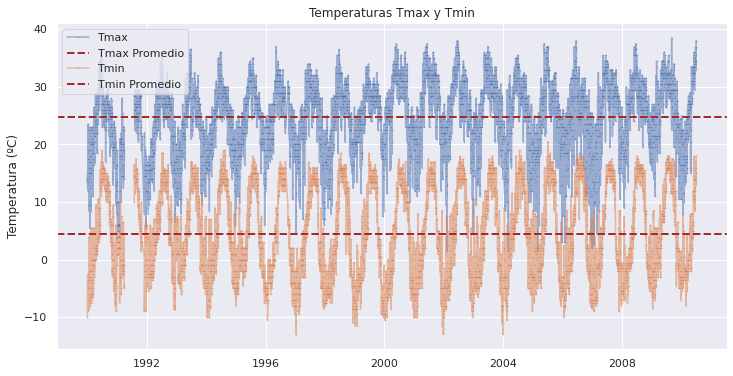

In [ ]:
# Grafica todo el rango de datos utilizando la función df.plot(), incluye una
# línea punteada mostrando el promedio. 
# Graficas de Temperaturas Tmax, Tmin y Promedios  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1990-01', '2020-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

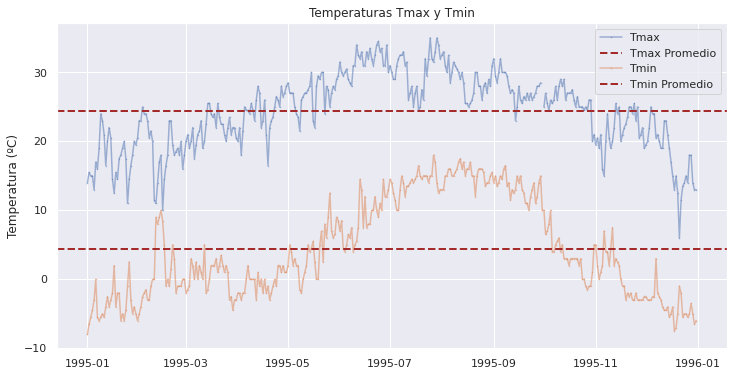

In [ ]:
# Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc() 
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1995-01', '1995-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

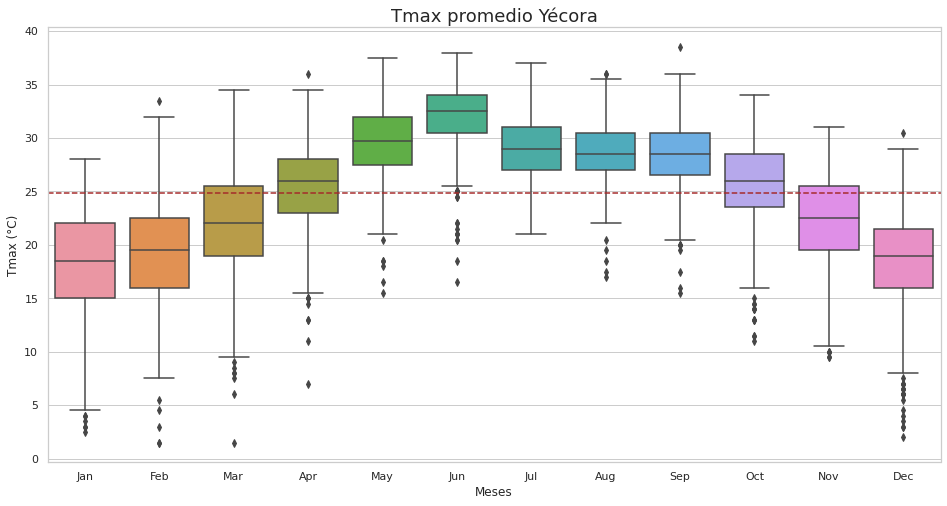

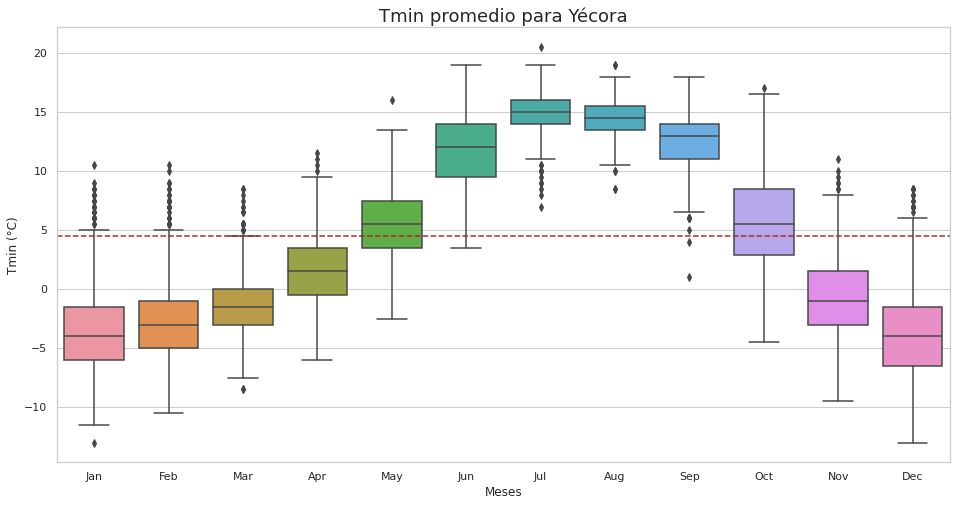

In [ ]:
# Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(),
# incluye una línea punteada mostrando el promedio.  

# Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

#Tmax
sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 1 mes años de datos usando la columna 'Mes' en el eje x
g =sns.boxplot(x='Mes', y='Tmax', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Tmax (°C)')
plt.axhline(y=df_90['Tmax'].mean(),linestyle='--',color='brown',label='TMax'+' '+'Promedio')
plt.title('Tmax promedio Yécora', fontsize=18)

plt.show()


#Tmin
sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 1 mes años de datos usando la columna 'Mes' en el eje x
g =sns.boxplot(x='Mes', y='Tmin', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Tmin (°C)')
plt.axhline(y=df_90['Tmin'].mean(),linestyle='--',color='brown',label='TMax'+' '+'Promedio')
plt.title('Tmin promedio para Yécora', fontsize=18)

plt.show()

# Actividad 3

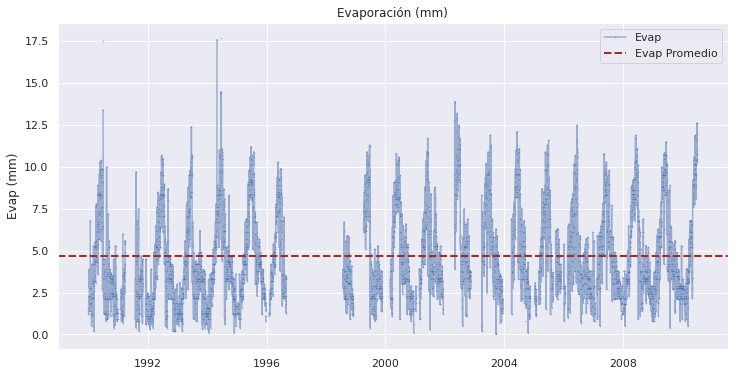

In [ ]:
# Actividad 3.Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.

# Grafica todo el rango de datos utilizando la función df.plot(), incluye una
# línea punteada mostrando el promedio. 
# Graficas de Evaporación
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1990-01', '2020-12'

fig, ax = plt.subplots()
for nm in ['Evap']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Evap (mm)')
    ax.set_title('Evaporación (mm)');

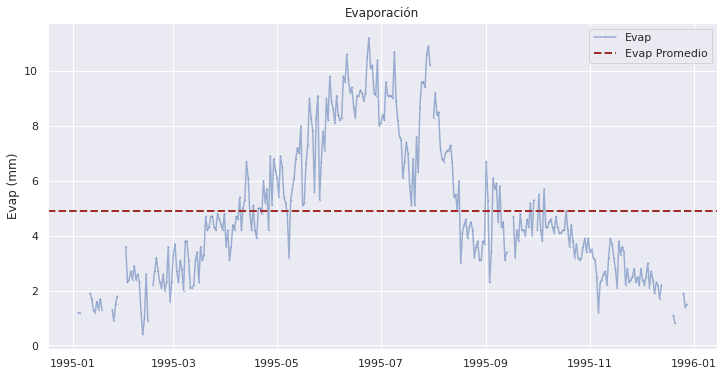

In [ ]:
# Analiza un año específico completo para la Evaporación, con apoyo de la función df.loc() 
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1995-01', '1995-12'

fig, ax = plt.subplots()
for nm in ['Evap']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Evap (mm)')
    ax.set_title('Evaporación');

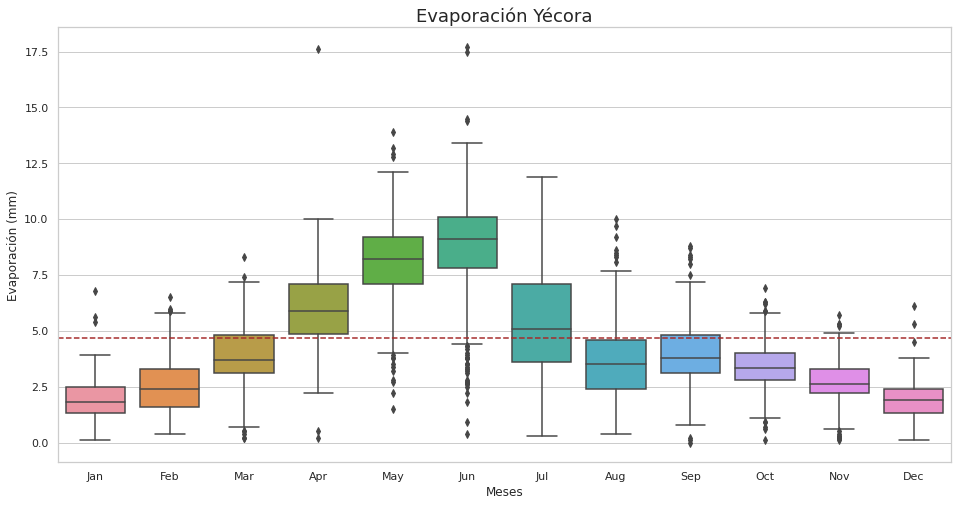

In [ ]:
# Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(),
# incluye una línea punteada mostrando el promedio.  

# Grafica la estacionalidad de tus datos por mes utilizando la función sns.boxplot() 

#Tmax
sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 1 mes años de datos usando la columna 'Mes' en el eje x
g =sns.boxplot(x='Mes', y='Evap', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.axhline(y=df_90['Evap'].mean(),linestyle='--',color='brown',label='Evaporación'+' '+'Promedio')
plt.title('Evaporación Yécora', fontsize=18)

plt.show()


# Actividad 4

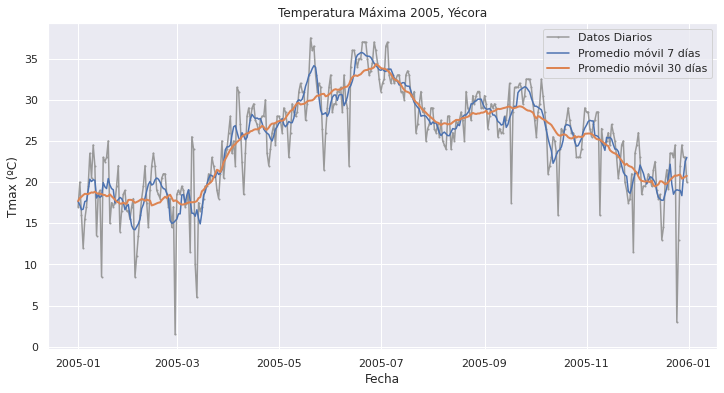

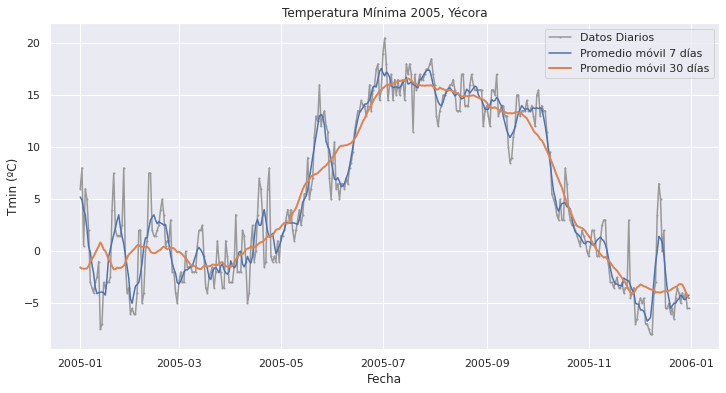

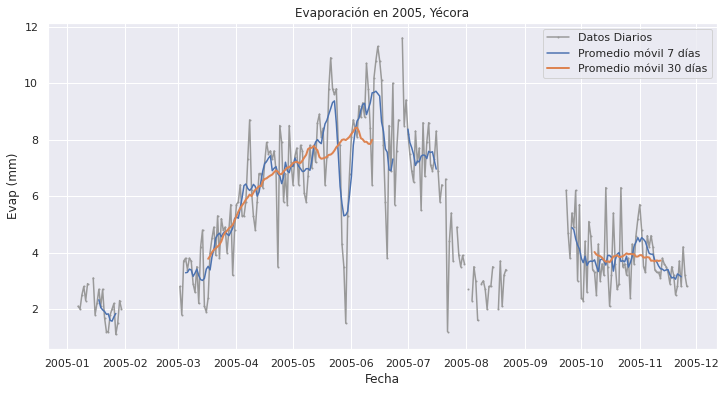

In [ ]:
# Actividad 4.  Crea nuevos DataFrames de las Temperaturas y la Evaporación
# con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:

# - Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. 
# - Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.
#-------------------------------------------------------------------------------

# Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. 
# Suavizando las curvas, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()
# Tendencias ... año con año

# Fechas de inicio y fin, para filtrar la información
start, end = '2005-01', '2005-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

#Tmax
fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
#ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2005, Yécora')
ax.legend();

#Tmin
fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
#ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2005, Yécora')
ax.legend();

#Evap
fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Evap'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
#ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evap (mm)')
ax.set_title('Evaporación en 2005, Yécora')
ax.legend();



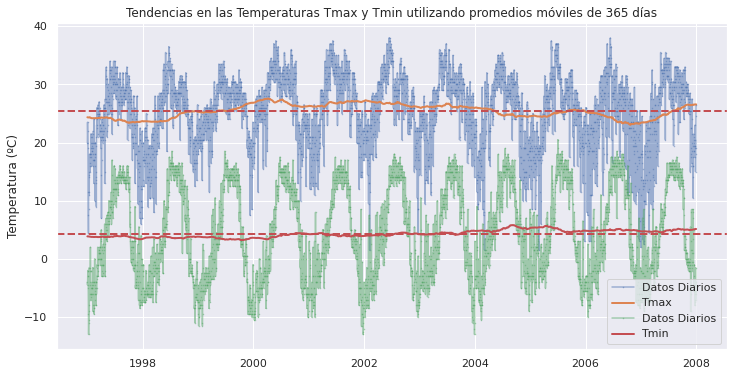

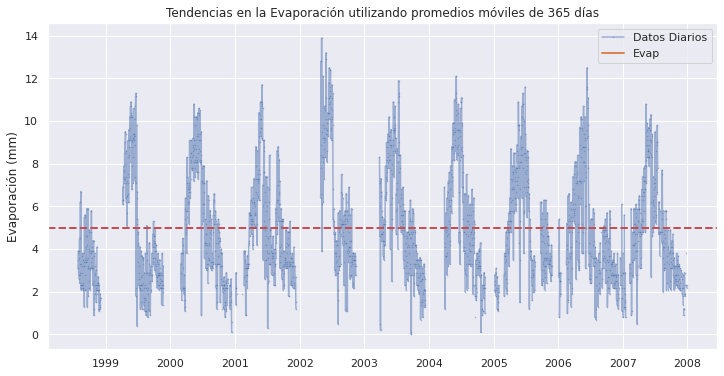

In [ ]:
# - Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.

# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1997-01', '2007-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

fig, ax = plt.subplots()
for nm in ['Evap']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Evaporación (mm)')
    ax.set_title('Tendencias en la Evaporación utilizando promedios móviles de 365 días');


# Actividad 5

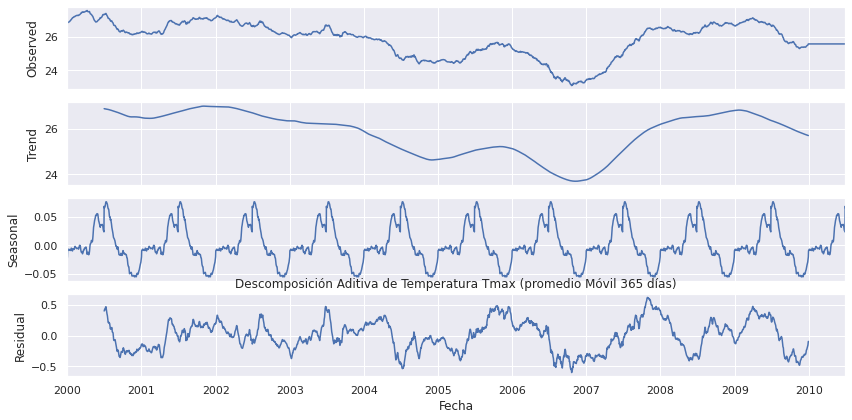

In [ ]:
# Actividad 5. Utiliza la biblioteca statsmodels.tsa de Python, para realizar 
# una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.

# Aplica la función seasonal_decompose para lograr esto, a los datos de 
# Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona
# un periodo que haya datos. La función de seasonal_decompose aplica su 
# propio promedio móvil a las series de datos para su análisis.  


# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Tmax
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2010-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');


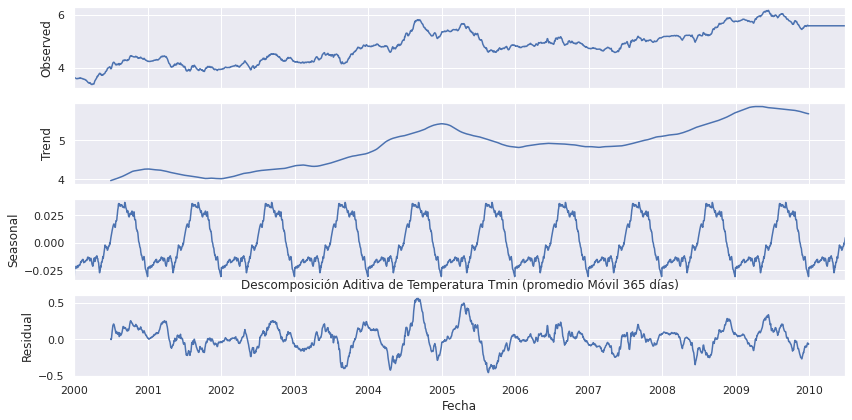

In [ ]:
# Tamaño de la figura
# Tmin
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2010-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');


In [ ]:
# Tamaño de la figura
# Evap
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2006-01', '2007-12'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Evap'].interpolate(),freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

# NO PUDE ENCONTRAR UN RANGO SIN DATOS FALTANTES

ValueError: ignored

# Actividad 6

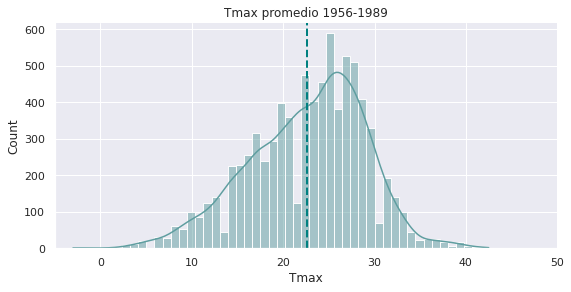

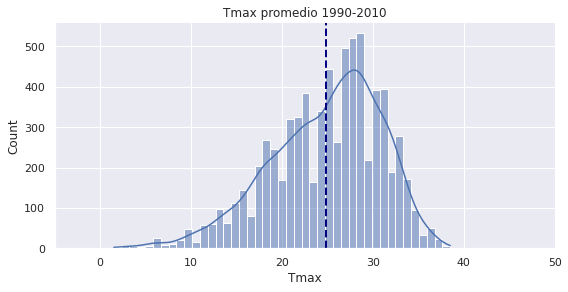

Tmax_promedio df_60 =  22.650461849930412 ºC
Tmax_promedio df_90 =  24.829002192982454 ºC


In [ ]:
# Actividad 6. Por favor explora visualmente si se observa un cambio en la 
# distribución de Temperaturas (histogramas y kde), sobreponiendo dos 
# histogramas de dos periodos de 30 años contiguos. Utiliza la función de
# Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor 
# del promedio de cada grupo de datos. 

# Gráfica de distribuciones de Temperaturas Tmax 
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12, 6)})
g2 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2, label='Distribucion de Tmax 1956-1989');
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal', label='Promedio Tmax 1956-1989');

g3 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2, label='Distribucion de Tmax 1990-2010');
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy', label='Promedio Tmax 1956-1989');



g2.set(title='Tmax promedio 1956-1989');
g3.set(title='Tmax promedio 1990-2010');

g2.set(xlim=(-5,50))
g3.set(xlim=(-5,50))


plt.show();

print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )

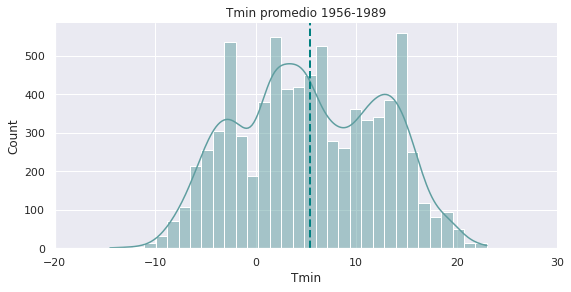

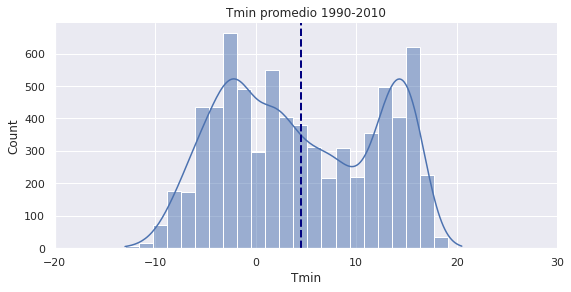

Tmax_promedio df_60 =  5.426273118824423 ºC
Tmax_promedio df_90 =  4.465410442647663 ºC


In [ ]:
# Gráfica de distribuciones de Temperaturas Tmin
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12, 6)})
g2 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2, label='Distribucion de Tmin 1956-1989');
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal', label='Promedio Tmin 1956-1989');

g3 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2, label='Distribucion de Tmin 1990-2010');
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy', label='Promedio Tmin 1956-1989');


g2.set(title='Tmin promedio 1956-1989');
g3.set(title='Tmin promedio 1990-2010');

g2.set(xlim=(-20,30))
g3.set(xlim=(-20,30))


plt.show();

print('Tmax_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )